<a href="https://colab.research.google.com/github/nghiho112/color-accessibility-app/blob/model/Color_Classifier_Trim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import pathlib
import matplotlib.pyplot as plt

In [ ]:
# Importing Tensorflow
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.15.0


In [ ]:
#install this one before put everything in .py file
!pip install git+https://github.com/tensorflow/docs # Use some functions from tensorflow_docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-6xo4l8pw
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-6xo4l8pw
  Resolved https://github.com/tensorflow/docs to commit 8b36191001b53bfce4fe15b77e243fbd7f382e41
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2024.2.5.73858-py3-none-any.whl size=182442 sha256=9cc9fbe91311c17cda5109ef45203a02bffb79f8c18e7317c0be5ae7c29ef019
  Stored in directory: /tmp/pip-ephem-wheel-cache-1ktnhhv4/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
#might not need it (will be deleted)

#plotly used for plotting Interactive Graphs
!pip install plotly
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
#Loading data set
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import os

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/Color/final_data.csv'

if not os.path.exists(data_path):
  print("The path doesn't exist!")

dataset = pd.read_csv(data_path)
dataset

,red,green,blue,label
0,20,139,240,Blue
1,174,83,72,Brown
2,144,249,131,Green
3,168,25,156,Pink
4,30,182,136,Green
...,...,...,...,...
5047,26,26,26,Black
5048,27,27,27,Black
5049,28,28,28,Black
5050,29,29,29,Black


In [ ]:
#preprocessing dataset

#To find whether null entries are present
dataset.isnull().sum()


#One-hot-encoding to convert categirical data int numerric data
dataset.label.unique()
dataset = pd.get_dummies(dataset, columns=['label'])
#dataset


#reorder
dataset.columns
dataset = dataset[['red', 'green', 'blue', 'label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]
print(dataset)

#split data into training and testing set
train_dataset = dataset.sample(frac=0.8, random_state=8) #train = 80%,  random_state = any int value means every time when you run your program you will get the same output for train and test dataset, random_state is None by default which means every time when you run your program you will get different output because of splitting between train and test varies within
test_dataset = dataset.drop(train_dataset.index) #remove train_dataset from dataframe to get test_dataset
print(train_dataset)

#split features: red-green-blue and labels
train_labels = pd.DataFrame([train_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T
#print(train_label)

test_labels = pd.DataFrame([test_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T




      red  green  blue  label_Red  label_Green  label_Blue  label_Yellow  \
0      20    139   240          0            0           1             0   
1     174     83    72          0            0           0             0   
2     144    249   131          0            1           0             0   
3     168     25   156          0            0           0             0   
4      30    182   136          0            1           0             0   
...   ...    ...   ...        ...          ...         ...           ...   
5047   26     26    26          0            0           0             0   
5048   27     27    27          0            0           0             0   
5049   28     28    28          0            0           0             0   
5050   29     29    29          0            0           0             0   
5051   30     30    30          0            0           0             0   

      label_Orange  label_Pink  label_Purple  label_Brown  label_Grey  \
0             

#Try decision tree + Random forest

In [ ]:
#normalize data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()

train_dataset_x = scaler.fit_transform(train_dataset)
train_dataset_x
test_dataset_x = scaler.transform(test_dataset)



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the model
decision_tree = DecisionTreeClassifier(random_state=8)

# Fit the model on the training data
decision_tree.fit(train_dataset, train_labels)

# Predict on the test data
dt_predictions = decision_tree.predict(test_dataset)

# Calculate the accuracy
dt_accuracy = accuracy_score(test_labels, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)


Decision Tree Accuracy: 0.8118811881188119


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from keras.callbacks import EarlyStopping, ModelCheckpoint

#parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],

}


# Initialize the model
random_forest = RandomForestClassifier(random_state=8)

# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

grid_search = GridSearchCV(estimator=random_forest, param_grid= param_grid, cv =3, n_jobs =-1, verbose =0, scoring = 'accuracy' )


# Fit the model on the training data
grid_search.fit(train_dataset_x, train_labels)

best_param = grid_search.best_estimator_
# Predict on the test data
rf_predictions = best_param.predict(test_dataset_x)

# Calculate the accuracy
rf_accuracy = accuracy_score(test_labels, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Accuracy: 0.8316831683168316


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the model
random_forest = RandomForestClassifier(random_state=8)

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Create the GridSearchCV object with early stopping
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, n_jobs=-1, verbose=0, scoring='accuracy', callbacks=[early_stopping])

# Fit the model on the training data
grid_search.fit(train_dataset_x, train_labels)

# Predict on the test data
rf_predictions = grid_search.best_estimator_.predict(test_dataset_x)

# Calculate the accuracy
rf_accuracy = accuracy_score(test_labels, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

TypeError: GridSearchCV.__init__() got an unexpected keyword argument 'callbacks'

#ANN Modoel

In [ ]:
#try optimize param
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dropout, BatchNormalization

model = keras.Sequential([
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=[len(train_dataset.keys())]),
    BatchNormalization(),
    Dropout(0.2),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    layers.Dense(11)
])





NameError: name 'Adam' is not defined


Epoch: 0, accuracy:0.7046,  loss:0.7435,  val_accuracy:0.7812,  val_loss:0.5674,  
.................

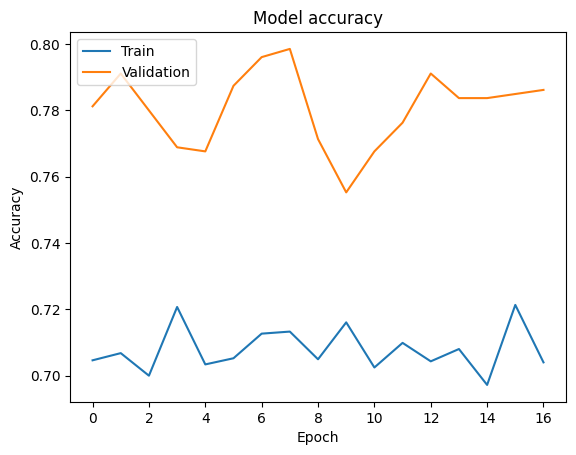

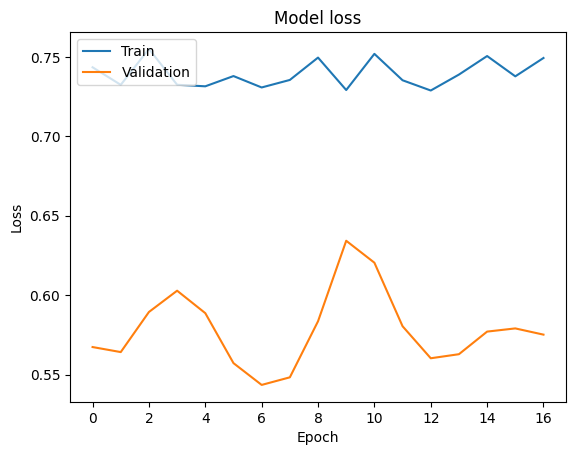

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt

# Assuming the model is defined somewhere above this snippet
optimizer = Adam(learning_rate=0.001)
loss_function = CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#model_checkpoint = ModelCheckpoint( monitor='val_loss', verbose=0)

history = model.fit(x=train_dataset, y=train_labels, validation_split=0.2, epochs=3000, batch_size=2048,callbacks=[tfdocs.modeling.EpochDots(), early_stopping],verbose=0, shuffle=True)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:

#build model and compile

from keras import regularizers
model = keras.Sequential([
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=[len(train_dataset.keys())]), #inputshape=[3]
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(11)
  ])

#compile model - using Adam optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])



In [ ]:
#will be remove in .py file
#model summary
model.summary(0)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 3)                 12        
                                                                 
 batch_normalization_4 (Bat  (None, 3)                 12        
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 3)                 0         
                                                                 
 dense_11 (Dense)            (None, 24)                96        
                                                                 
 batch_normalization_5 (Bat  (None, 24)                96        
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 24)               

In [ ]:
#Training model
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt
#compile model - using Adam optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])

history = model.fit(x=train_dataset, y=train_labels,
                    validation_split=0.2,
                    epochs=3000,
                    batch_size=2048,
                    verbose=0,
                    callbacks=[tfdocs.modeling.EpochDots()],
                    shuffle=True)



Epoch: 0, accuracy:0.0677,  loss:2.8648,  val_accuracy:0.2559,  val_loss:2.6325,  
....................................................................................................
Epoch: 100, accuracy:0.3260,  loss:1.9376,  val_accuracy:0.3152,  val_loss:1.8503,  
....................................................................................................
Epoch: 200, accuracy:0.5135,  loss:1.3431,  val_accuracy:0.5686,  val_loss:1.2306,  
....................................................................................................
Epoch: 300, accuracy:0.6078,  loss:1.0897,  val_accuracy:0.6687,  val_loss:0.9315,  
....................................................................................................
Epoch: 400, accuracy:0.6341,  loss:1.0144,  val_accuracy:0.7046,  val_loss:0.8399,  
....................................................................................................
Epoch: 500, accuracy:0.6545,  loss:0.9671,  val_accuracy:0.7367,  val_l

#Save model

In [ ]:
#save model
#Install PyDrive library into Google Colab notebook
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

!pip install pyyaml h5py  # Required to save models in HDF5 format

# Save Model or weights on google drive and create on Colab directory in Google Drive

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('colormodel.keras')
model_file = drive.CreateFile({'title' : 'colormodel.keras'}) # colormodel_acu_  .h5 is the name of the model uploaded to Drive
model_file.SetContentFile('colormodel.keras')
model_file.Upload()



In [ ]:
!pip install joblib
import joblib

# Assuming 'model' is the variable containing your trained model
# Replace 'your_model.pkl' with the desired file name
joblib.dump(model, 'color.pkl')




['color.pkl']

In [ ]:
from google.colab import files

files.download('color.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# download to google drive
drive.CreateFile({'id': model_file.get('id')}) ### very important to run this last cell for loading the model in new notebook

GoogleDriveFile({'id': '1lNW-RjpGB0VAWjjMqAwK3H_IzVenJd4c'})

In [ ]:
#Load model from google drive into colab
file_obj = drive.CreateFile({'id': '1lNW-RjpGB0VAWjjMqAwK3H_IzVenJd4c'})
file_obj.GetContentFile('colormodel.keras') #colormodel_trained.h5 is the name of model uploaded to colab

In [ ]:
#will be remove in .py
ls #check for the saved model on googledrive

NameError: ignored

#Img testing cell

In [ ]:
import numpy as np
from PIL import Image

#load model to run prediction
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('colormodel.keras') #very important

# Load the image using PIL (Pillow)
image_path = '/content/drive/MyDrive/Color/test_set/Red_Rose.JPG'
image = Image.open(image_path)

# new_size = (10,10)
# image = image.resize(new_size)

plt.imshow(image) #remove in .py
plt.show()        #remove in .py

# Convert the image to a NumPy array
image_array = np.array(image)

# Extract the red, green, and blue channels into separate arrays
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

# Create a DataFrame with the red, green, and blue channels
import pandas as pd

image_df = pd.DataFrame({'red': red_channel.ravel(),
                         'green': green_channel.ravel(),
                         'blue': blue_channel.ravel()})

# Display the DataFrame
print(image_df)

#Predict the data:
predictions = model.predict(image_df)

#selecting class with highest confidence
actual_encoded_train_labels = np.argmax(train_labels.to_numpy(), axis=1) #train_labels were originally in one-hot

predicted_encoded_train_labels = np.argmax(predictions, axis=1)

predicted_encoded_train_labels = pd.DataFrame(predicted_encoded_train_labels, columns=['Labels'])
predicted_encoded_train_labels

predicted_encoded_train_labels.to_csv('predicted_labels.csv', index =False)


NameError: ignored